# Effect of various variables on Full Time Result of Premier League matches
## by Emil Delvaux

## Investigation Overview

> In this investigation, I wanted to look at the effects that various variables such as number of shots the home team took, or the number of yellow cards the away team received, had on the full time result of the match.

## Dataset Overview

> The data consisted of 3420 instances of football matches, over a period of 9 seasons. The data contained various data such as the number of shots the home team had and how many shots were on target, as well as what the full time result was. Fifty-five variables were removed as they were either incomplete or not relevant to the analysis.

- **HomeTeam**: Team playing at their home ground. They face the team playing away.
- **AwayTeam**: Team playing away from their home ground. They face the team playing at home.
- **FTHG**: Full Time Home Goals. Number of goals home team scored at the end of the match.
- **FTAG**: Full Time Away Goals. Number of goals away team scored at the end of the match.
- **FTR**: Full Time Result. H: Home team won, D: Draw, A: Away team won
- **HTHG**: Half Time Home Goals. Number of goals home team scored until half time.
- **HTAG**: Half Time Away Goals. Number of goals away team scored until half time.
- **HS**: Home Shots. Number of shots home team had in the whole match.
- **AS**: Away Shots. Number of shots away team had in the whole match.
- **HST**: Home Shots on Target. Number of shots home team had on target (at the away teams goal) in the whole match.
- **AST**: Away Shots on Target. Number of shots away team had on target (at the home teams goal) in the whole match.
- **HF**: Home Fouls. Number of fouls home team committed in the whole match.
- **AF**: Away Fouls. Number of fouls away team committed in the whole match.
- **HC**: Home Corners. Number of corners home team had in the whole match.
- **AC**: Away Corners. Number of corners away team had in the whole match.
- **HY**: Home Yellow. Number of yellow cards home team received in the whole match.
- **AY**: Away Yellow. Number of yellow cards away team received in the whole match.
- **HR**: Home Red. Number of red cards home team received in the whole match.
- **AR**: Away Red. Number of red cards away team received in the whole match.
- **B365H**: Bet365Home. Odds of home team winning as per the betting company Bet365.
- **B365D**: Bet365Draw. Odds of a draw as per the betting company Bet365.
- **B365A**: Bet365Away. Odds of away team winning as per the betting company Bet365.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe and perform data wrangling ro remove unnecessary variables.
# Convert FTR to category

plt.style.use('tableau-colorblind10')
data = pd.read_csv('FullBettingDF.csv', index_col=0)
data.drop(data.loc[:, 'BWH':].columns, axis=1, inplace=True) 
data.drop(['Div', 'Date', 'Referee', 'HTR'], axis=1, inplace=True)
data['FTR'] = data['FTR'].astype('category')

## Distribution of shots for home and away teams

> This graph shows us that the peaks between home team shots and away team shots have a difference of about 5 shots, in favour of the home team. This is to be expected as the home team will have the support of their home fans to push them to win the game, therefore leading to the home team having a greater advantage.

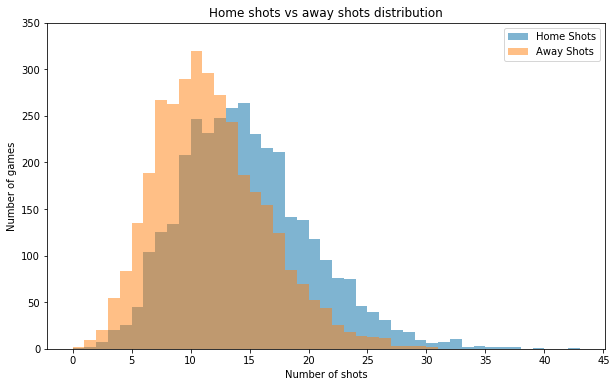

In [3]:
binsize = 1
bins = np.arange(0, data['HS'].max()+binsize, binsize)
yticks = [0, 50, 100, 150, 200, 250, 300, 350]
xticks = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
plt.figure(figsize=[10, 6])

plt.hist(data['HS'], bins, alpha=0.5, label='Home Shots')
plt.hist(data['AS'], bins, alpha=0.5, label='Away Shots')
plt.yticks(yticks)
plt.xticks(xticks)
plt.xlabel('Number of shots')
plt.ylabel('Number of games')
plt.title('Home shots vs away shots distribution')
plt.legend(loc='upper right');

## Home team shots vs Away team shots in a match

> Scatter plot of home shots vs away shots, with the addition of a linear regression plot. This shows us the negative correlation between the two variables, with homes shots increasing causing a decrease in away shots. We would expect this relationship, as if one team has a lot of shots, they will generally have more possession of the ball, meaning the other team will have fewer opporunities to have a shot.

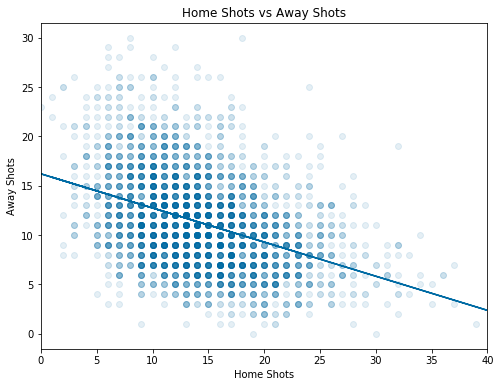

In [4]:
# scatter plot showing home shots vs away shots

plt.figure(figsize = [8, 6])
plt.scatter(data = data, x = 'HS', y = 'AS', alpha = 1/10)
plt.xlim([0, 40])
plt.xlabel('Home Shots')
plt.yticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45])
plt.ylabel('Away Shots')
plt.title('Home Shots vs Away Shots')
m, b = np.polyfit(data['HS'], data['AS'], 1)
plt.plot(data['HS'], m*data['HS'] + b);

## Home team shots vs Away team shots, and the effect they have on FTR

> Below we see a very simple graph showing the the effect that HS and AS had on the FTR. We can clearly see that points towards the lower right are more grey, indicating a FTR of H, and points to the upper left are more blue, indicating a FTR of A. This shows us that when the hometeam has more shots than the away team, they usually tend to win, and the same is true vice versa. Notice however, that whilst there are very few blue points in the lower right, there are a few grey points in the top left, which shows that even in games when the away team has a lot more shots than the home team, the home team still has a chance to win, simply due to the advantage of playing at home.

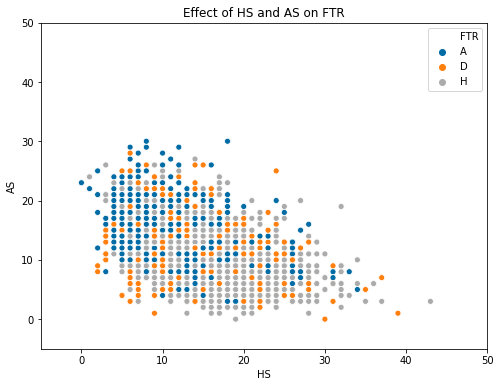

In [5]:
xlimit = [-5, 50]
ylimit = [-5, 50]
plt.figure(figsize = [8, 6])
sns.scatterplot(x=data['HS'],
                y=data['AS'],
                hue=data['FTR'])
plt.title('Effect of HS and AS on FTR')
plt.xlim(xlimit)
plt.ylim(ylimit);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!